### 수원 및 수원 인근 소재 대학교

In [2]:
import folium
import requests, json
from urllib.parse import quote
import pandas as pd

- API Key

In [3]:
with open('data/roadapikey.txt') as f:
    road_key = f.read()
with open('data/kakaoapikey.txt') as f:
    kakao_key = f.read()

- 지도에 표시할 대상

In [4]:
search_list = '아주대학교,동남보건대학,수원 경기대학교,수원 성균관대학교,수원여자대학,용인 경희대학교,수원대학교,수원과학대학'.split(',')
search_list

['아주대학교',
 '동남보건대학',
 '수원 경기대학교',
 '수원 성균관대학교',
 '수원여자대학',
 '용인 경희대학교',
 '수원대학교',
 '수원과학대학']

In [5]:
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApiJsonp.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10&resultType=json'

- 도로명 주소 가져오기

In [6]:
road_addr_list = []
for place in search_list:
    url = f'{base_url}?{params1}&keyword={quote(place)}'
    result = requests.get(url)
    if result.status_code == 200:
        res = json.loads(result.text[1:-1])
        road_addr_list.append(res['results']['juso'][0]['roadAddr'])
    else:
        print(result.status_code)

- search함수는 처음부터 검사해 나감

In [7]:
df = pd.DataFrame({
    '대학명': list(map(lambda x: x.split()[-1], search_list)),
    '주소': road_addr_list
})
df

,대학명,주소
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동)
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동)
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동)
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동)
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동)
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동)
6,수원대학교,경기도 화성시 봉담읍 와우안길 17
7,수원과학대학,경기도 화성시 정남면 세자로 288


In [8]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [9]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df.주소[i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [10]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,대학명,주소,위도,경도
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동),37.252705,126.963307
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199
6,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480
7,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927


In [ ]:
#이미지 파일 이름 이름정해주기
df['logo'] = ['filename','']

In [11]:
df.to_csv('data/수원소재대학(쌤).csv',index=False)

- 지도에 표시


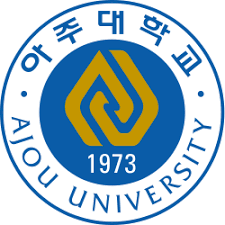
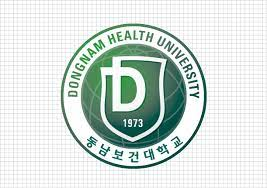
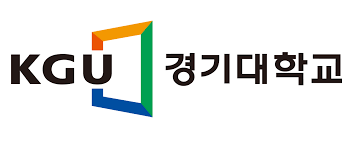
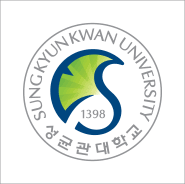
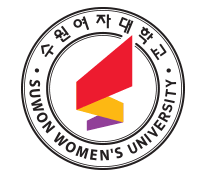
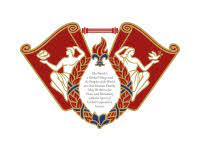
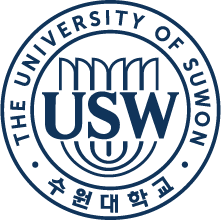
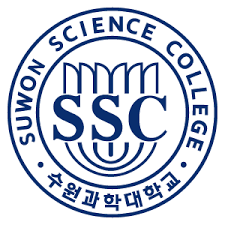

In [19]:
univ = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=11)

for i in df.index:
    logo = folium.CustomIcon(f'data/대학교/{df.대학명[i]}.jpg', icon_size=(30,30))
    folium.Marker(
        location=[df.위도[i], df.경도[i]],
        popup=folium.Popup(df.주소[i], max_width=200),
        tooltip=df.대학명[i], 
        icon=logo
    ).add_to(univ)

title_html = '<h3 align="center" style="font-size:20px">수원 소재 대학</h3>'
univ.get_root().html.add_child(folium.Element(title_html))
univ